## Importing Dataset

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [103]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Preparation

### Select only the features from above and fill in the missing values with 0.

In [104]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [105]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [106]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [107]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

### Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [108]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

### Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [109]:
df['population_per_household'] = df['population'] / df['households']

In [110]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [111]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Answer 1 : <1H OCEAN

<AxesSubplot:>

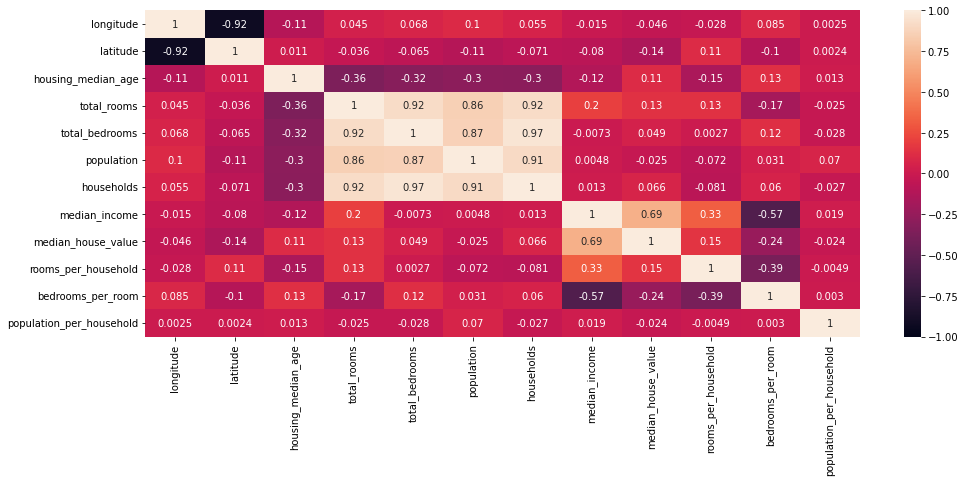

In [112]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### Answer 2 - total_bedrooms and households have the highest correlation

### Make median_house_value binary
* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [113]:
mean_median_house_price = df['median_house_value'].mean()
df['above_average'] = (df['median_house_value'] > mean_mean_house_price).astype('int')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


### Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [117]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train.shape, df_test.shape, df_val.shape

((12384, 14), (4128, 14), (4128, 14))

In [118]:
y_train = df_train['above_average'].values
y_test = df_test['above_average'].values
y_val = df_val['above_average'].values

df_train.drop(columns= ['median_house_value', 'above_average'], inplace=True)
df_test.drop(columns= ['median_house_value', 'above_average'], inplace=True)
df_val.drop(columns= ['median_house_value', 'above_average'], inplace=True)


#### Question 3
* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

### Feature Importance : Mutual Information

In [119]:
from sklearn.metrics import mutual_info_score

In [124]:
df_full_train.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int32
dtype: object

In [123]:
round(mutual_info_score(df_full_train['above_average'], df_full_train['ocean_proximity']),3)

0.102

### Answer 3 - 0.10

#### Question 4
* <b>Now let's train a logistic regression
* <b>Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* <b>Fit the model on the training dataset.
* <b>To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* <b>model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* <b>Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

### One-hot Encoding Categorical Variables

In [125]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train.to_dict(orient='records')
train_dicts[0]

{'longitude': -119.67,
 'latitude': 34.43,
 'housing_median_age': 39.0,
 'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0,
 'median_income': 2.3681,
 'ocean_proximity': '<1H OCEAN',
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657}

In [126]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [127]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [128]:
X_train.shape

(12384, 16)

In [129]:
val_dicts = df_val.to_dict(orient='records')
val_dicts[0]

{'longitude': -119.85,
 'latitude': 36.74,
 'housing_median_age': 35.0,
 'total_rooms': 1191.0,
 'total_bedrooms': 190.0,
 'population': 537.0,
 'households': 182.0,
 'median_income': 3.5375,
 'ocean_proximity': 'INLAND',
 'rooms_per_household': 6.543956043956044,
 'bedrooms_per_room': 0.15952980688497062,
 'population_per_household': 2.9505494505494507}

In [130]:
X_val = dv.transform(val_dicts)

In [131]:
X_val.shape

(4128, 16)

### Applying Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [133]:
y_pred = model.predict_proba(X_val)[:, 1]

In [134]:
price_above_avg = y_pred > 0.5

In [136]:
round((y_val == price_above_avg).mean(),2)

0.84

### Answer 4 - Accuracy of Model is 0.84

### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * total_rooms
    * total_bedrooms
    * population
    * households
* note: the difference doesn't have to be positive

In [156]:
small_model_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [157]:
dict_small = df_train[small_model_features].to_dict(orient='records')
dict_small[0]

{'total_rooms': 1467.0,
 'total_bedrooms': 381.0,
 'population': 1404.0,
 'households': 374.0}

In [158]:
X_train_small = dv.fit_transform(dict_small)

In [159]:
dict_small_val = df_val[small_model_features].to_dict(orient='records')
dict_small_val[0]

{'total_rooms': 1191.0,
 'total_bedrooms': 190.0,
 'population': 537.0,
 'households': 182.0}

In [160]:
X_val_small = dv.transform(dict_small_val)

In [161]:
model_small = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_small.fit(X_train_small, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [163]:
y_pred_small = model_small.predict_proba(X_val_small)[:, 1]

In [164]:
price_above_avg_small = y_pred_small > 0.5

In [165]:
og_accuracy = (y_val == price_above_avg_small).mean()
og_accuracy

0.7095445736434108

### Model without total_rooms

In [166]:
small_model_features1 = ['total_bedrooms', 'population', 'households']

In [167]:
dict_small1 = df_train[small_model_features1].to_dict(orient='records')
dict_small1[0]

{'total_bedrooms': 381.0, 'population': 1404.0, 'households': 374.0}

In [168]:
X_train_small1 = dv.fit_transform(dict_small1)

In [169]:
dict_small_val1 = df_val[small_model_features1].to_dict(orient='records')
dict_small_val1[0]

{'total_bedrooms': 190.0, 'population': 537.0, 'households': 182.0}

In [170]:
X_val_small1 = dv.transform(dict_small_val1)

In [171]:
model_small1 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_small1.fit(X_train_small1, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [175]:
y_pred_small1 = model_small1.predict_proba(X_val_small1)[:, 1]
price_above_avg_small1 = y_pred_small1 > 0.5
accuracy_no_tot_rooms = (y_val == price_above_avg_small1).mean()
accuracy_no_tot_rooms

0.6276647286821705

### Model without total_bedrooms

In [176]:
small_model_features2 = ['total_rooms', 'population', 'households']

dict_small2 = df_train[small_model_features2].to_dict(orient='records')
X_train_small2 = dv.fit_transform(dict_small2)\

dict_small_val2 = df_val[small_model_features2].to_dict(orient='records')
X_val_small2 = dv.transform(dict_small_val2)

model_small2 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_small2.fit(X_train_small2, y_train)

y_pred_small2 = model_small2.predict_proba(X_val_small2)[:, 1]
price_above_avg_small2 = y_pred_small2 > 0.5
accuracy_no_tot_bedrooms = (y_val == price_above_avg_small2).mean()
accuracy_no_tot_bedrooms

0.6608527131782945

### Model without population

In [177]:
small_model_features3 = ['total_rooms', 'total_bedrooms', 'households']

dict_small3 = df_train[small_model_features3].to_dict(orient='records')
X_train_small3 = dv.fit_transform(dict_small3)

dict_small_val3 = df_val[small_model_features3].to_dict(orient='records')
X_val_small3 = dv.transform(dict_small_val3)

model_small3 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_small3.fit(X_train_small3, y_train)

y_pred_small3 = model_small3.predict_proba(X_val_small3)[:, 1]
price_above_avg_small3 = y_pred_small3 > 0.5
accuracy_no_pop = (y_val == price_above_avg_small3).mean()
accuracy_no_pop

0.656734496124031

### Model without households

In [179]:
small_model_features4 = ['total_rooms', 'total_bedrooms', 'population']

dict_small4 = df_train[small_model_features4].to_dict(orient='records')
X_train_small4 = dv.fit_transform(dict_small4)

dict_small_val4 = df_val[small_model_features4].to_dict(orient='records')
X_val_small4 = dv.transform(dict_small_val4)

model_small4 = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_small4.fit(X_train_small4, y_train)

y_pred_small4 = model_small4.predict_proba(X_val_small4)[:, 1]
price_above_avg_small4 = y_pred_small4 > 0.5
accuracy_no_households = (y_val == price_above_avg_small4).mean()
accuracy_no_households

0.6719961240310077

In [183]:
og_accuracy, accuracy_no_households, accuracy_no_pop, accuracy_no_tot_bedrooms, accuracy_no_tot_rooms

(0.7095445736434108,
 0.6719961240310077,
 0.656734496124031,
 0.6608527131782945,
 0.6276647286821705)

In [202]:
og_accuracy - accuracy_no_households, og_accuracy - accuracy_no_pop, og_accuracy - accuracy_no_tot_bedrooms, og_accuracy - accuracy_no_tot_rooms

(0.03754844961240311,
 0.05281007751937983,
 0.04869186046511631,
 0.08187984496124034)

### Model with feature : households has the least difference in accuracy

### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
* If there are multiple options, select the smallest alpha.

* Options:

    * 0
    * 0.01
    * 0.1
    * 1
    * 10


In [184]:
df_full_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814,0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095,1
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214,0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366,0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000,0


## Split the Data

In [185]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train.shape, df_test.shape, df_val.shape

((12384, 14), (4128, 14), (4128, 14))

In [188]:
y_train = np.log(df_train['median_house_value'].values)
y_test = np.log(df_test['median_house_value'].values)
y_val = np.log(df_val['median_house_value'].values)

df_train.drop(columns= ['median_house_value', 'above_average'], inplace=True)
df_test.drop(columns= ['median_house_value', 'above_average'], inplace=True)
df_val.drop(columns= ['median_house_value', 'above_average'], inplace=True)

## Apply Model - Ridge Regression

In [201]:
from sklearn.linear_model import Ridge
from sklearn import metrics

dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

a = [0, 0.01, 0.1, 1, 10]
rmse_dict = {}
for i in a:
    model = Ridge(alpha=i, solver="sag", random_state=42)
    model.fit(X_train, y_train)

# print(model.intercept_)

# print(model.coef_)

    y_pred = model.predict(X_val)

    mae = metrics.mean_absolute_error(y_val, y_pred)

    mse = metrics.mean_squared_error(y_val, y_pred)

    rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    rmse_dict[i] = rmse
rmse_dict 

{0: 0.524067160039661,
 0.01: 0.5240671600567748,
 0.1: 0.5240671602193535,
 1: 0.5240671618537078,
 10: 0.5240671781715663}

### Smallest RMSE is 0 and biggest rmse is 10